<a href="https://colab.research.google.com/github/shob69/Sentimental_analysis_using_NaiveBayes/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Tweets.csv to Tweets (3).csv


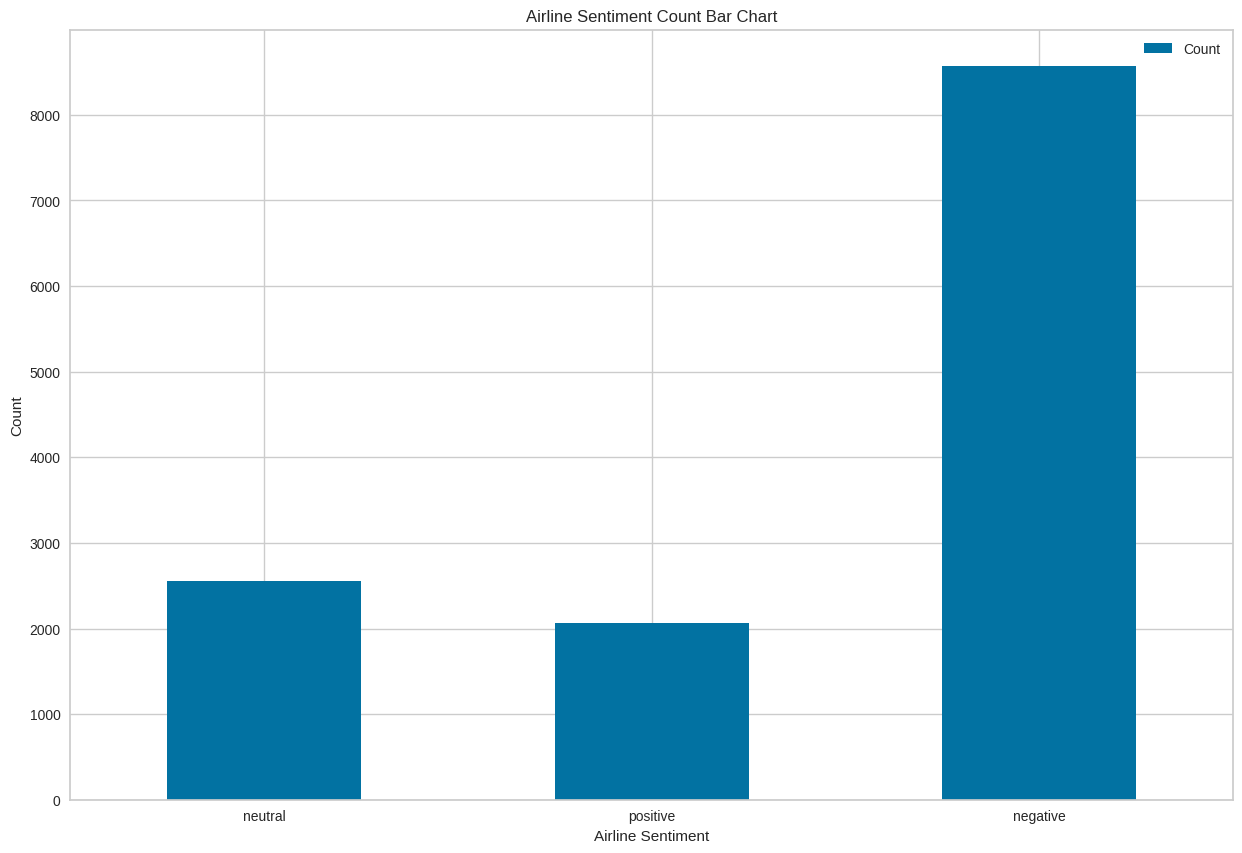

In [ ]:
from google.colab import files
tweets=files.upload()
from PIL import Image
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ROCAUC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
tweets = pd.read_csv('Tweets.csv')
tweets.head(5)
tweets['negativereason_gold'].value_counts()
tweets['airline_sentiment_gold'].value_counts()
tweets['retweet_count'].value_counts()
tweets['tweet_coord'].value_counts()
tweets.drop('negativereason_gold', axis=1, inplace=True)
tweets.drop('airline_sentiment_gold', axis=1, inplace=True)
tweets.drop('retweet_count', axis=1, inplace=True)
tweets.drop('tweet_coord', axis=1, inplace=True)

tweets.drop('tweet_location', axis=1, inplace=True)
tweets.drop('tweet_created', axis=1, inplace=True)
tweets.drop('user_timezone', axis=1, inplace=True)
tweets.drop('name', axis=1, inplace=True)

list(tweets.columns)
unmeaningful = ['i', 'you', 'me', 'to', 'the', 'a', 'my', 'is', 'in', 'and', 'for', 'on', 'of',
                'your', 'so', 'was', 'have', 'it', 'at', 'with', 'that', 'from', 'do', 'get',
                'but', 'this', 'can', 'just', 'they', 'we', 'are', 'an', 'be', "i'm", 'will',
                'if', 'had', 'our', 'about', 'there', 'has', 'been', '-', 'by', 'like', 'or',
                'as', 'he', 'she', 'it', 'us', 'has' ,"i've", "it's", "don't", 'would', 'am',
               'flight', 'customer', 'any', 'very', "didn't", "you've", 'thing', 'take',
               'other', 'u', '', ' ']
def clean_text(str_in):
    """Remove special characters, @airline/username, empty string and
    unmeaningful words from the original text.

    Args:
        str_in: A string representing a Tweet.

    Returns:
        A string similar to the input string, but it does not have
        special characters, @airline, empty word, or any unmeaningful
        words listed above. For example:
        "thanks"
    """
    res = ""
    str_in = str_in.lower()
    str_arr = str_in.split(' ')
    for word in str_arr:
        word = word.lower()
        if '@' in word or word == '' or word[:1] == '&':
            continue
        if word.lower() in unmeaningful:
            continue
        if word.isnumeric():
            continue
        res = res + " " + word
    return res
tweets["text"] = tweets["text"].apply(clean_text)
tweets.head(5)
sentiments = tweets['airline_sentiment'].unique()
sentiments
total_negative = tweets[tweets['airline_sentiment'] == 'negative']['airline_sentiment_confidence'].sum()
total_positive = tweets[tweets['airline_sentiment'] == 'positive']['airline_sentiment_confidence'].sum()
total_neutral = tweets[tweets['airline_sentiment'] == 'neutral']['airline_sentiment_confidence'].sum()

values = [total_neutral, total_positive, total_negative]
dictionary1 = {'Airline Sentiment':sentiments, 'Count':values}

dfSentimentCount = pd.DataFrame(dictionary1)
dfSentimentCount.head(3)
temp = dfSentimentCount.plot.bar(x='Airline Sentiment', y='Count', rot=0, figsize=(15,10))

plt.title('Airline Sentiment Count Bar Chart')
plt.xlabel('Airline Sentiment')
plt.ylabel('Count')

plt.show()
